In [15]:
import os
import cv2
import numpy as np
import pandas as pd

image_path = r"/home/hany_jr/Ai/Data sets/Face mask/archive/images"
image_anno = r"/home/hany_jr/Ai/Data sets/Face mask/archive/annotations"

In [16]:
# convert the image and annotation to list
image_names = os.listdir(image_path)
anno_names = os.listdir(image_anno)
image_names[:5], anno_names[:5]

(['maksssksksss188.png',
  'maksssksksss274.png',
  'maksssksksss411.png',
  'maksssksksss718.png',
  'maksssksksss29.png'],
 ['maksssksksss851.xml',
  'maksssksksss28.xml',
  'maksssksksss17.xml',
  'maksssksksss688.xml',
  'maksssksksss620.xml'])

In [17]:
# convert the image to dataframe
image_dataframe = pd.DataFrame(image_names, columns=["path"])
image_dataframe.head()

,path
0,maksssksksss188.png
1,maksssksksss274.png
2,maksssksksss411.png
3,maksssksksss718.png
4,maksssksksss29.png


In [18]:
%cd "/home/hany_jr/Ai/Data sets/Face mask/archive"

/home/hany_jr/Ai/Data sets/Face mask/archive


In [19]:
# Parse XML File for anno_names
import xml.etree.ElementTree as ET


def xml_to_yolo_bndbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]


def parse_xml(path):

    classes = {"without_mask": 0, "with_mask": 1, "mask_weared_incorrect": 2}

    tree = ET.parse(os.path.join(image_anno, path))
    root = tree.getroot()
    file_name = root[1].text.split(".")[0] + ".txt"
    # get the image size, width, height
    width = int(root[2][0].text)
    height = int(root[2][1].text)

    # get object name, xmin, ymin, xmax, ymax

    result = [file_name]

    for object in root.iter("object"):
        name = object.find("name").text
        bndbox = [classes[name]]
        for b in object.find("bndbox"):
            bndbox.append(int(b.text))

        normalized_bndbox = xml_to_yolo_bndbox(bndbox[1:], width, height)

        result.append(normalized_bndbox)

    return result


os.makedirs("labels", exist_ok=True)
for path in anno_names:

    txt_yolo_format = parse_xml(path)
    name = txt_yolo_format[0]
    with open("labels/" + name, "w") as file:
        # convert the list to string which each element separated by space and each object separated by new line
        txt_yolo_format = "\n".join(
            [" ".join([str(e) for e in i]) for i in txt_yolo_format[1:]]
        )
        file.write(txt_yolo_format)

In [20]:

# create the train, test, and valid folder
# each folder contains the image and the label
os.makedirs('train/',exist_ok=True)
os.makedirs('train/images',exist_ok=True)
os.makedirs('train/labels',exist_ok=True)

os.makedirs('test/',exist_ok=True)
os.makedirs('test/images',exist_ok=True)
os.makedirs('test/labels',exist_ok=True)

os.makedirs('valid/',exist_ok=True)
os.makedirs('valid/images',exist_ok=True)
os.makedirs('valid/labels',exist_ok=True)


%ls

annotations/  images/  labels/  test/  train/  valid/


In [21]:
labels = os.listdir("labels")
labels.sort()
image_names.sort()
labels[:5], image_names[:5]

(['maksssksksss0.txt',
  'maksssksksss1.txt',
  'maksssksksss10.txt',
  'maksssksksss100.txt',
  'maksssksksss101.txt'],
 ['maksssksksss0.png',
  'maksssksksss1.png',
  'maksssksksss10.png',
  'maksssksksss100.png',
  'maksssksksss101.png'])

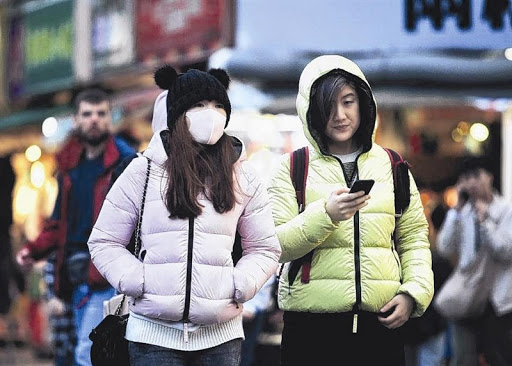

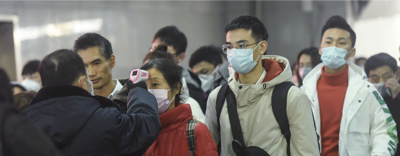

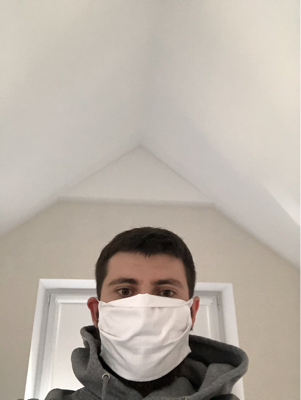

In [22]:
from IPython.display import display, Image

for i in range(3):
    display(Image(filename="images/" + image_names[i]))

In [23]:
# create dataframe for the image and label
df = pd.DataFrame({"image": image_names, "label": labels})
df

,image,label
0,maksssksksss0.png,maksssksksss0.txt
1,maksssksksss1.png,maksssksksss1.txt
2,maksssksksss10.png,maksssksksss10.txt
3,maksssksksss100.png,maksssksksss100.txt
4,maksssksksss101.png,maksssksksss101.txt
...,...,...
848,maksssksksss95.png,maksssksksss95.txt
849,maksssksksss96.png,maksssksksss96.txt
850,maksssksksss97.png,maksssksksss97.txt
851,maksssksksss98.png,maksssksksss98.txt


In [24]:
from sklearn.model_selection import train_test_split

train, test_val = train_test_split(df, test_size=0.4, random_state=42)
test, valid = train_test_split(test_val, test_size=0.5, random_state=42)
train.shape, test.shape, valid.shape

((511, 2), (171, 2), (171, 2))

In [25]:
train

,image,label
693,maksssksksss722.png,maksssksksss722.txt
529,maksssksksss575.png,maksssksksss575.txt
94,maksssksksss183.png,maksssksksss183.txt
11,maksssksksss108.png,maksssksksss108.txt
396,maksssksksss455.png,maksssksksss455.txt
...,...,...
71,maksssksksss162.png,maksssksksss162.txt
106,maksssksksss194.png,maksssksksss194.txt
270,maksssksksss341.png,maksssksksss341.txt
435,maksssksksss490.png,maksssksksss490.txt


In [26]:
!ls

# move the image and label to the train folder
for i in range(train.shape[0]):
    os.rename("images/" + train.iloc[i, 0], "train/images/" + train.iloc[i, 0])
    os.rename("labels/" + train.iloc[i, 1], "train/labels/" + train.iloc[i, 1])
    
# move the image and label to the test folder
for i in range(test.shape[0]):
    os.rename("images/" + test.iloc[i, 0], "train/images/" + test.iloc[i, 0])
    os.rename("labels/" + test.iloc[i, 1], "train/labels/" + test.iloc[i, 1])

# move the image and label to the valid folder
for i in range(valid.shape[0]):
    os.rename("images/" + valid.iloc[i, 0], "train/images/" + valid.iloc[i, 0])
    os.rename("labels/" + valid.iloc[i, 1], "train/labels/" + valid.iloc[i, 1])


annotations  images  labels  test  train  valid


In [27]:
ymal_file = """train: /home/hany_jr/Ai/Data sets/Face mask/archive/train/images
valid: /home/hany_jr/Ai/Data sets/Face mask/archive/valid/images

nc: 3
names: ['without_mask', 'with_mask', 'mask_weared_incorrect']
"""

%cd "/home/hany_jr/Ai/face-mask-detection"
with open("data.yaml", "w") as file:
    file.write(ymal_file)

/home/hany_jr/Ai/face-mask-detection


In [28]:
%cd "/home/hany_jr/Ai/Data sets/Face mask/archive"

os.makedirs(r'results',exist_ok=True)

/home/hany_jr/Ai/Data sets/Face mask/archive
